<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


#  Statistics for Data Science with Python Final Project
## Boston Housing Data: Statistical Insights
## Amer Hussein

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statsmodels.api as sm

In [ ]:
boston_url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)


In [4]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [5]:
boston_df.dtypes

Unnamed: 0      int64
CRIM          float64
ZN            float64
INDUS         float64
CHAS          float64
NOX           float64
RM            float64
AGE           float64
DIS           float64
RAD           float64
TAX           float64
PTRATIO       float64
LSTAT         float64
MEDV          float64
dtype: object

In [6]:
boston_df.drop(['Unnamed: 0'], axis=1, inplace=True)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [7]:
indexes=['Count']
tab_df=pd.DataFrame(boston_df.count(), columns=indexes)
tab_df

,Count
CRIM,506
ZN,506
INDUS,506
CHAS,506
NOX,506
RM,506
AGE,506
DIS,506
RAD,506
TAX,506


In [8]:
table = [[col, (boston_df[col] == 0).sum(), (boston_df[col] == 'NaN').sum()] for col in boston_df.columns]
tab_df = pd.DataFrame(table, columns=['Column Name', 'Count of zeros', 'Count of NaN']).reset_index(drop=True)
df_reset = tab_df.set_index('Column Name')
df_reset


,Count of zeros,Count of NaN
Column Name,,
CRIM,0,0
ZN,372,0
INDUS,0,0
CHAS,471,0
NOX,0,0
RM,0,0
AGE,0,0
DIS,0,0
RAD,0,0


In [9]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [11]:
Styles = [dict(selector="caption", props=[("color", "black"), ("text-align", "center")])]
cor_df = boston_df.corr()['MEDV'].sort_values().rename('R').to_frame()
cor_df = cor_df.style.set_caption('<b>Correlation Coeff R of all features with MEDV</b>').set_table_styles(Styles)
cor_df


,R
LSTAT,-0.737663
PTRATIO,-0.507787
INDUS,-0.483725
TAX,-0.468536
NOX,-0.427321
CRIM,-0.388305
RAD,-0.381626
AGE,-0.376955
CHAS,0.175260
DIS,0.249929


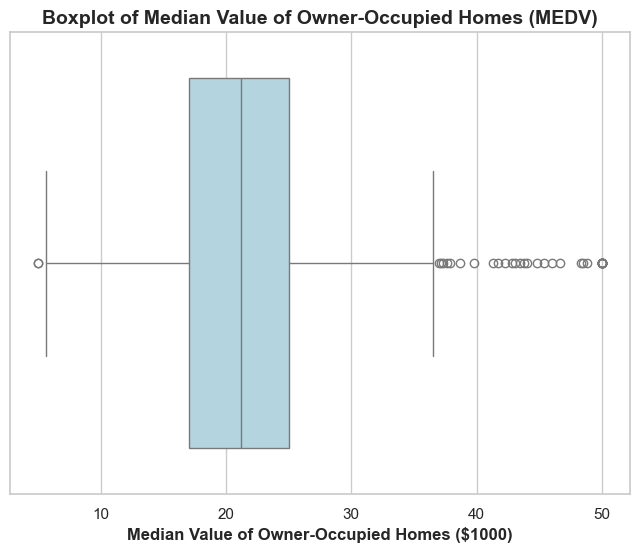

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)', fontsize=14, fontweight='bold')
sns.boxplot(x=boston_df['MEDV'], color='lightblue')
plt.xlabel('Median Value of Owner-Occupied Homes ($1000)', fontsize=12, fontweight='bold')
plt.show()


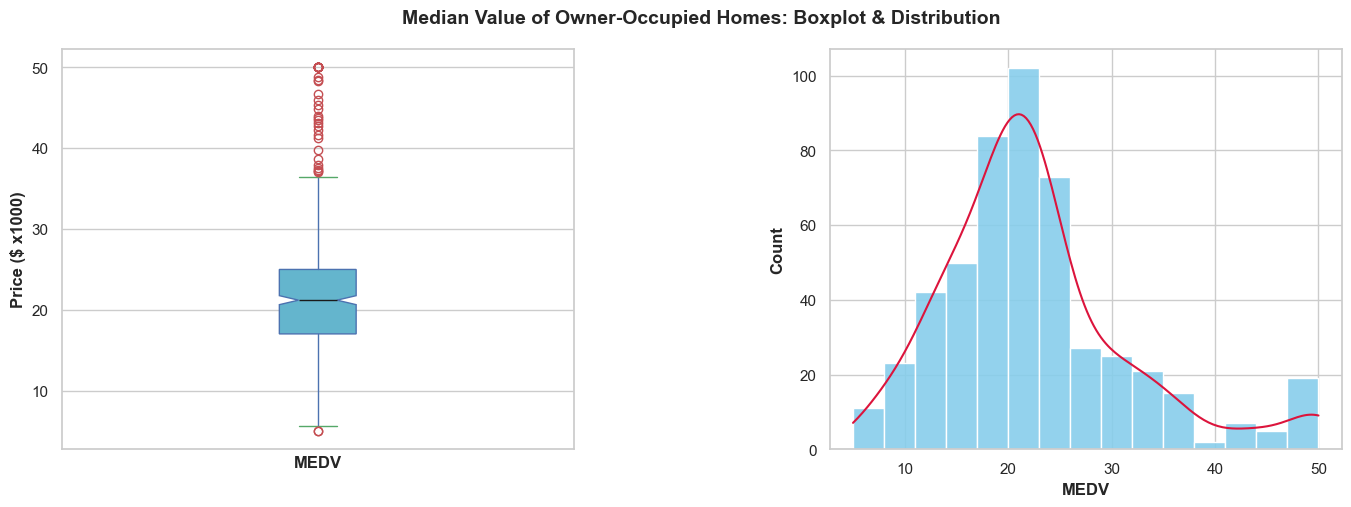

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.4)


fig.suptitle('Median Value of Owner-Occupied Homes: Boxplot & Distribution', fontsize=14, fontweight='bold')
ax[0].boxplot(boston_df['MEDV'], notch=True, patch_artist=True,
              boxprops=dict(facecolor='c', color='b'),
              capprops=dict(color='g'),
              whiskerprops=dict(color='b'),
              flierprops=dict(marker='o', color='m', markeredgecolor='r'),
              medianprops=dict(color='k'))

ax[0].set_xticks([])
ax[0].set_ylabel('Price ($ x1000)', weight='bold')
ax[0].set_xlabel('MEDV', weight='bold')


sns.histplot(data=boston_df, x='MEDV', bins=15, color='skyblue', alpha=0.9, kde=True, ax=ax[1])


ax[1].lines[0].set_color('crimson')


ax[1].set_ylabel('Count', weight='bold')
ax[1].set_xlabel('MEDV', weight='bold')

plt.show()


C:\Users\amero\AppData\Local\Temp\ipykernel_46100\2975576679.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AGE_group', y='MEDV', data=boston_df, palette='Set3')


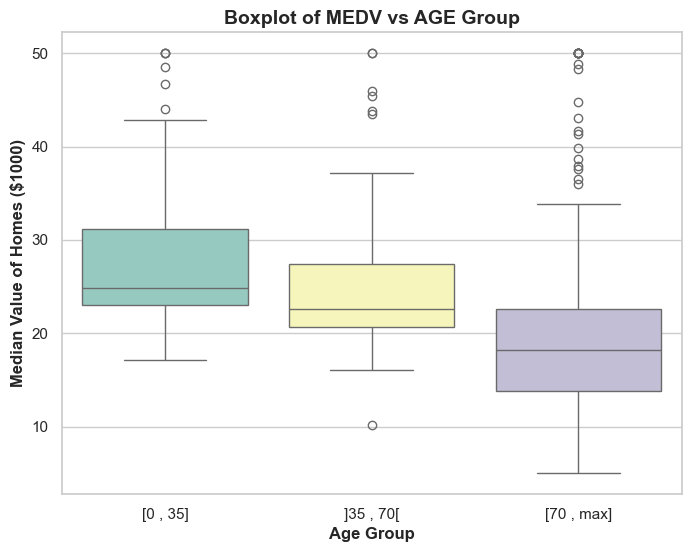

In [29]:
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, boston_df['AGE'].max()], labels=['[0 , 35]', ']35 , 70[', '[70 , max]'])

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
plt.title('Boxplot of MEDV vs AGE Group', fontsize=14, fontweight='bold')
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df, palette='Set3')
plt.xlabel('Age Group', fontsize=12, fontweight='bold')
plt.ylabel('Median Value of Homes ($1000)', fontsize=12, fontweight='bold')
plt.show()


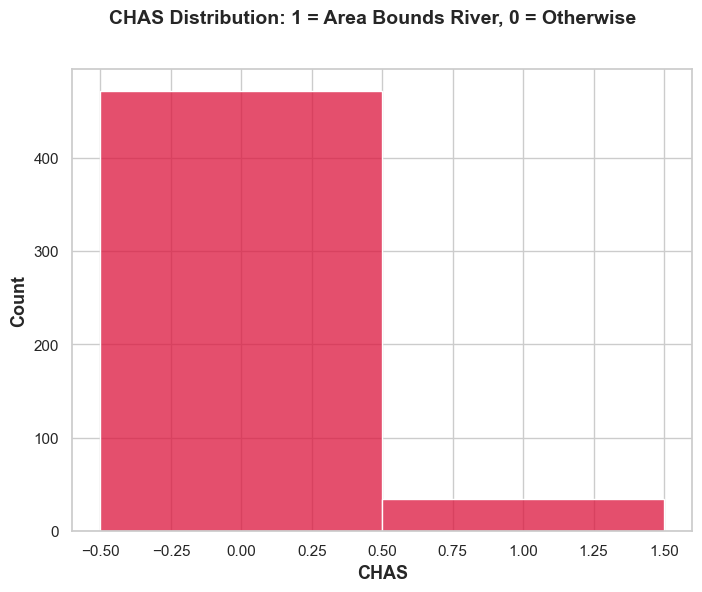

In [15]:
fig = plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
fig.suptitle('CHAS Distribution: 1 = Area Bounds River, 0 = Otherwise', fontsize=14, fontweight='bold')
ax = sns.histplot(data=boston_df, x="CHAS", color="crimson", discrete=True)
ax.set_xlabel('CHAS', fontsize=13, fontweight='bold')
ax.set_ylabel('Count', fontsize=13, fontweight='bold')
plt.show()


In [16]:
boston_df['CHAS'].value_counts()
tab_df=pd.DataFrame(boston_df['CHAS'].value_counts())


In [17]:
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_group'] = 0
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_group'] = 1
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_group'] = 2

In [18]:
boston_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_group
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,1.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,2.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,1.0


C:\Users\amero\AppData\Local\Temp\ipykernel_46100\3236507619.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['[0 , 35]', ']35 , 70[', '[70 , max]'], fontweight='bold')


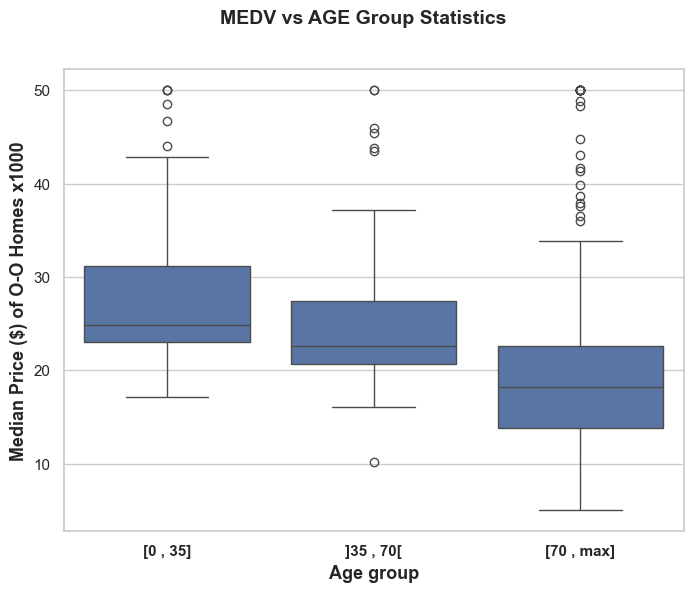

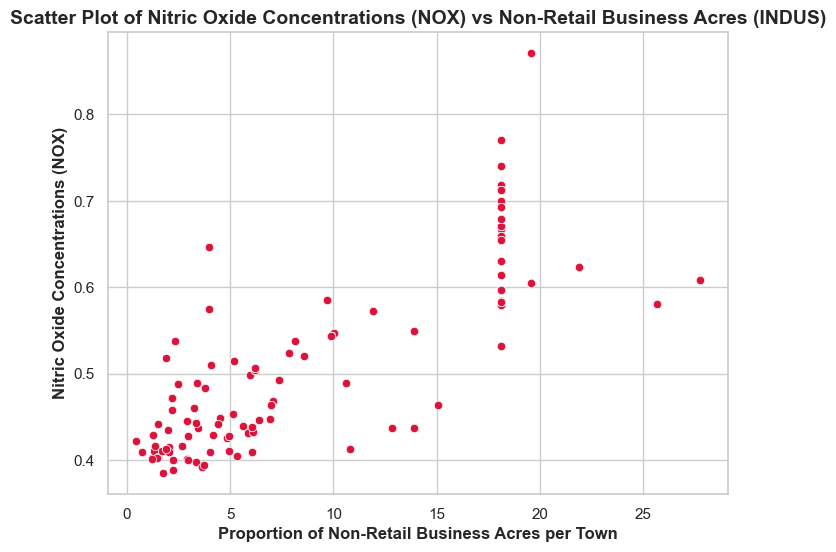

In [30]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
plt.title('Scatter Plot of Nitric Oxide Concentrations (NOX) vs Non-Retail Business Acres (INDUS)', fontsize=14, fontweight='bold')
sns.scatterplot(x='INDUS', y='NOX', data=boston_df, color='crimson')
plt.xlabel('Proportion of Non-Retail Business Acres per Town', fontsize=12, fontweight='bold')
plt.ylabel('Nitric Oxide Concentrations (NOX)', fontsize=12, fontweight='bold')
plt.show()


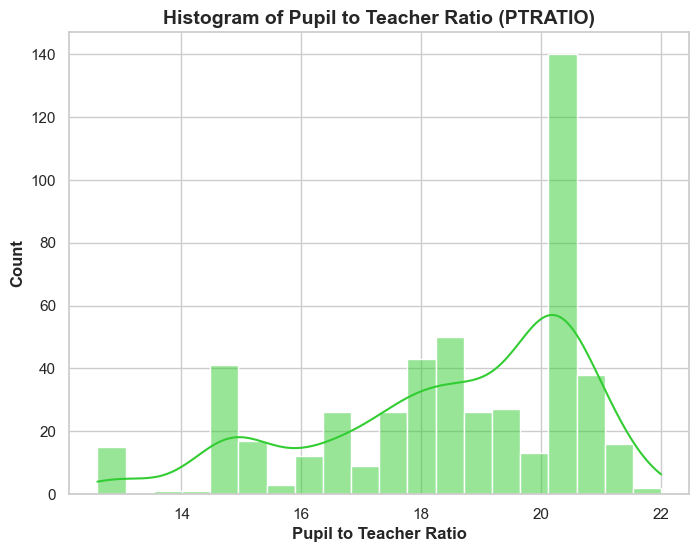

In [31]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
plt.title('Histogram of Pupil to Teacher Ratio (PTRATIO)', fontsize=14, fontweight='bold')
sns.histplot(data=boston_df, x='PTRATIO', color='limegreen', bins=20, kde=True)
plt.xlabel('Pupil to Teacher Ratio', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.show()


# Task 3

In [ ]:
from scipy.stats import ttest_ind


group_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
group_2 = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_value = ttest_ind(group_1, group_2)


t_stat, p_value


(3.996437466090509, 7.390623170519905e-05)

# Reject Null as p_value <0.05

In [ ]:
from scipy.stats import f_oneway

boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, boston_df['AGE'].max()], labels=['[0 , 35]', ']35 , 70[', '[70 , max]'])

group_1 = boston_df[boston_df['AGE_group'] == '[0 , 35]']['MEDV']
group_2 = boston_df[boston_df['AGE_group'] == ']35 , 70[']['MEDV']
group_3 = boston_df[boston_df['AGE_group'] == '[70 , max]']['MEDV']

f_stat, p_value = f_oneway(group_1, group_2, group_3)

f_stat, p_value


(36.40764999196599, 1.7105011022702984e-15)

# Reject Null as p_value <0.05

In [ ]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

correlation, p_value


(0.7636514469209149, 7.913361061242812e-98)

# Reject Null as p_value <0.05

In [ ]:
import statsmodels.api as sm

X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 06 May 2025   Prob (F-statistic):           1.21e-08
Time:                        14:23:44   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\amero\AppData\Local\Temp\ipykernel_46100\779011521.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(X, model.params[1]*X + model.params[0], 'r' )


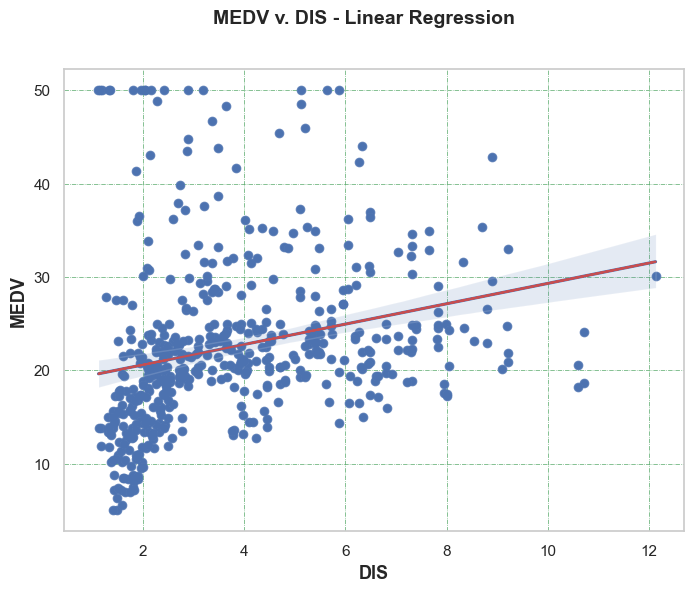

In [37]:
fig = plt.figure(figsize = (8, 6))
fig.suptitle('MEDV v. DIS - Linear Regression', fontsize=14, fontweight='bold')
ax= sns.scatterplot(x='DIS', y='MEDV', data=boston_df)
ax= sns.regplot(x='DIS', y='MEDV', data=boston_df)
plt.plot(X, model.params[1]*X + model.params[0], 'r' )
ax.grid(color='g', linestyle='-.', linewidth=0.5)
ax.set_ylabel('MEDV',  fontsize=13, fontweight='bold')
ax.set_xlabel('DIS', fontsize=13, fontweight='bold')
plt.show()